# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 132MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


In [302]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Importing Libraries

In [441]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [442]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [443]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [444]:
df.sample(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
58874,2016-2017,1279558,Special Ed AM Run,1348,M937,Heavy Traffic,02444,07/26/2016 06:59:00 AM,07/26/2016 07:00:00 AM,Manhattan,...,40mnts,0,Yes,Yes,No,07/26/2016 07:00:00 AM,NaN,07/26/2016 07:00:19 AM,Running Late,School-Age
276,2015-2016,1225829,Special Ed AM Run,1436,M744,Heavy Traffic,04750,10/29/2015 06:38:00 AM,10/29/2015 06:39:00 AM,Manhattan,...,30,3,Yes,Yes,No,10/29/2015 06:39:00 AM,NaN,10/29/2015 06:39:51 AM,Running Late,School-Age
104805,2016-2017,1326036,Special Ed AM Run,5014,L056,Heavy Traffic,22001,02/28/2017 06:50:00 AM,02/28/2017 06:50:00 AM,Brooklyn,...,25 min,0,Yes,Yes,No,02/28/2017 06:50:00 AM,NaN,02/28/2017 08:03:16 AM,Running Late,School-Age
60567,2016-2017,1281313,Special Ed AM Run,48164,N548,Mechanical Problem,75485,08/11/2016 07:05:00 AM,08/11/2016 07:11:00 AM,Nassau County,...,NaN,0,Yes,No,No,08/11/2016 07:11:00 AM,NaN,08/11/2016 07:11:30 AM,Breakdown,School-Age
73184,2016-2017,1293903,Special Ed AM Run,9047,R051,Heavy Traffic,31902,10/21/2016 06:25:00 AM,10/21/2016 06:31:00 AM,Staten Island,...,10-15MIINS,0,Yes,No,No,10/21/2016 06:31:00 AM,NaN,10/21/2016 06:31:13 AM,Running Late,School-Age


In [445]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [446]:
df.shape

(147972, 21)

In [447]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [448]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [449]:
df.describe(include='object')

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
count,147972,147883,147972,147884,147870,147972,147972,147972,141654,147972,126342,147972,147972,147972,147972,5632,147972,147972,147972
unique,4,10,10765,11283,10,5180,70108,75822,11,91,1863,2,2,2,75822,4666,145769,2,2
top,2016-2017,Special Ed AM Run,9354,1,Heavy Traffic,C814,01/25/2016 07:30:00 AM,01/26/2016 07:57:00 AM,Bronx,"G.V.C., LTD.",20 MINS,Yes,Yes,No,01/26/2016 07:57:00 AM,x,12/20/2016 02:31:32 PM,Running Late,School-Age
freq,83141,85990,468,2569,87426,1735,39,19,40995,14198,5662,139127,113098,101355,19,113,4,130857,127003


<Axes: xlabel='count', ylabel='Breakdown_or_Running_Late'>

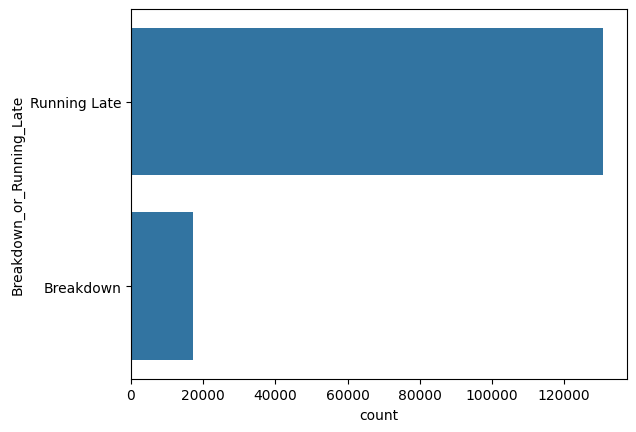

In [450]:
sns.countplot(df['Breakdown_or_Running_Late'])

In [451]:
cor = df.select_dtypes(include='number').corr()
cor

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


<Axes: >

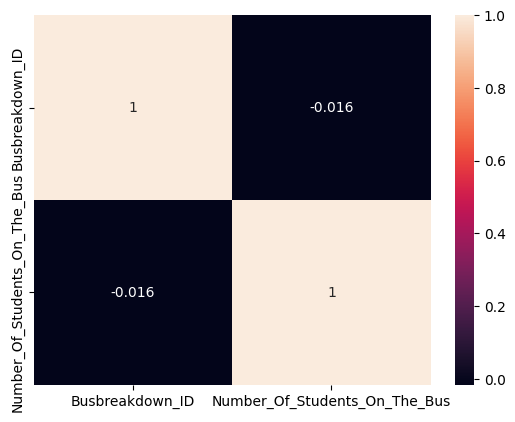

In [452]:
sns.heatmap(cor, annot=True)

<Axes: >

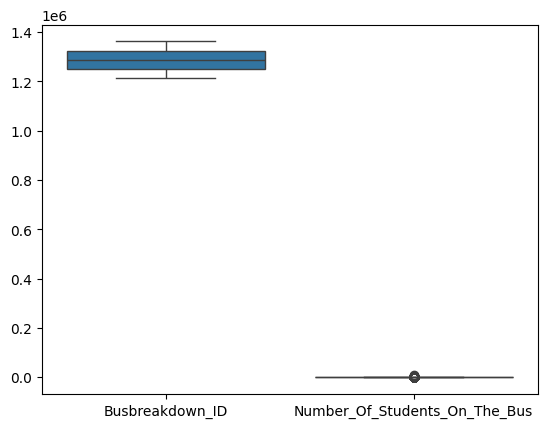

In [453]:
sns.boxplot(df)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [454]:
for col in df.columns:
  print('col name: ', col, ', type: ', df[col].dtypes, ', number of nulls: ',  df[col].isnull().sum(), '\n  ',  df[col].unique)
  print('-'*100)

col name:  School_Year , type:  object , number of nulls:  0 
   <bound method Series.unique of 0         2015-2016
1         2015-2016
2         2015-2016
3         2015-2016
4         2015-2016
            ...    
147967    2016-2017
147968    2016-2017
147969    2016-2017
147970    2016-2017
147971    2016-2017
Name: School_Year, Length: 147972, dtype: object>
----------------------------------------------------------------------------------------------------
col name:  Busbreakdown_ID , type:  int64 , number of nulls:  0 
   <bound method Series.unique of 0         1224901
1         1225098
2         1215800
3         1215511
4         1215828
           ...   
147967    1338452
147968    1341521
147969    1353044
147970    1353045
147971    1353046
Name: Busbreakdown_ID, Length: 147972, dtype: int64>
----------------------------------------------------------------------------------------------------
col name:  Run_Type , type:  object , number of nulls:  89 
   <bound method Serie

In [455]:
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])
df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode()[0])
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])
df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])
df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0])

In [456]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [457]:
df = df.drop('Incident_Number', axis=1)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147972 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147972 non-null  object
 5   Reason                           147972 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             147972 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 147972 non-null  object
 12  Number_Of_Studen

In [459]:
pd.to_datetime(df['Occurred_On'])

,Occurred_On
0,2015-10-26 08:30:00
1,2015-10-27 07:10:00
2,2015-09-18 07:36:00
3,2015-09-17 08:08:00
4,2015-09-18 07:39:00
...,...
147967,2017-04-05 08:00:00
147968,2017-04-24 07:42:00
147969,2017-05-25 16:22:00
147970,2017-05-25 16:27:00


In [460]:
pd.to_datetime(df['Informed_On'])

,Informed_On
0,2015-10-26 08:40:00
1,2015-10-27 07:11:00
2,2015-09-18 07:38:00
3,2015-09-17 08:12:00
4,2015-09-18 07:45:00
...,...
147967,2017-04-05 08:10:00
147968,2017-04-24 07:44:00
147969,2017-05-25 16:28:00
147970,2017-05-25 16:30:00


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147972 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147972 non-null  object
 5   Reason                           147972 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             147972 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 147972 non-null  object
 12  Number_Of_Studen

In [462]:
for col in df.columns:
  print('col name: ', col, ', type: ', df[col].dtypes, ', number of nulls: ',  df[col].isnull().sum(), '\n  ',  df[col].unique())
  print('-'*100)

col name:  School_Year , type:  object , number of nulls:  0 
   ['2015-2016' '2016-2017' '2017-2018' '2019-2020']
----------------------------------------------------------------------------------------------------
col name:  Busbreakdown_ID , type:  int64 , number of nulls:  0 
   [1224901 1225098 1215800 ... 1353044 1353045 1353046]
----------------------------------------------------------------------------------------------------
col name:  Run_Type , type:  object , number of nulls:  0 
   ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
----------------------------------------------------------------------------------------------------
col name:  Bus_No , type:  object , number of nulls:  0 
   ['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
----------------------------------------------------------------------------

In [463]:
df.duplicated().sum()

0

In [464]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [466]:
### it ruin the smote ###
# df['breakdown'] = df['Breakdown_or_Running_Late'] = 0

In [469]:
df = df.drop(['Last_Updated_On', 'Informed_On', 'Created_On', 'Occurred_On', 'Busbreakdown_ID'], axis=1)

In [470]:
# le = LabelEncoder()
# for col in df.select_dtypes(include='object').columns:
#   df[col] = le.fit_transform(df[[col]])

In [471]:
for col in df.columns:
  print('col name: ', col, ', type: ', df[col].dtypes, ', number of nulls: ',  df[col].isnull().sum(), '\n  ',  df[col].unique())
  print('-'*100)

col name:  School_Year , type:  object , number of nulls:  0 
   ['2015-2016' '2016-2017' '2017-2018' '2019-2020']
----------------------------------------------------------------------------------------------------
col name:  Run_Type , type:  object , number of nulls:  0 
   ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
----------------------------------------------------------------------------------------------------
col name:  Bus_No , type:  object , number of nulls:  0 
   ['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
----------------------------------------------------------------------------------------------------
col name:  Route_Number , type:  object , number of nulls:  0 
   ['1' '2' 'P640' ... '012' '29AM' '1409B']
------------------------------------------------------------------------------------------

In [472]:
le = LabelEncoder()
df['Breakdown_or_Running_Late'] = le.fit_transform(df[['Breakdown_or_Running_Late']])
df['School_Age_or_PreK'] = le.fit_transform(df[['School_Age_or_PreK']])
df['Have_You_Alerted_OPT'] = le.fit_transform(df[['Have_You_Alerted_OPT']])
df['Has_Contractor_Notified_Parents'] = le.fit_transform(df[['Has_Contractor_Notified_Parents']])
df['Has_Contractor_Notified_Schools'] = le.fit_transform(df[['Has_Contractor_Notified_Schools']])
df['How_Long_Delayed'] = le.fit_transform(df[['How_Long_Delayed']])
df['Bus_Company_Name'] = le.fit_transform(df[['Bus_Company_Name']])
df['Boro'] = le.fit_transform(df[['Boro']])
df['Schools_Serviced'] = le.fit_transform(df[['Schools_Serviced']])
df['Reason'] = le.fit_transform(df[['Reason']])
df['Route_Number'] = le.fit_transform(df[['Route_Number']])
df['Run_Type'] = le.fit_transform(df[['Run_Type']])
df['Bus_No'] = le.fit_transform(df[['Bus_No']])
df['School_Year'] = le.fit_transform(df[['School_Year']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [473]:
df.head()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,3,7481,77,6,5003,1,27,191,5,1,1,0,1,0
1,0,3,8114,77,3,5071,1,27,837,3,1,1,0,1,0
2,0,3,4662,209,3,4969,1,27,335,12,1,1,1,1,0
3,0,3,4547,209,6,4968,1,27,110,11,1,1,1,1,0
4,0,3,4554,209,6,5149,1,27,191,12,1,1,0,1,0


In [474]:
y = df['Breakdown_or_Running_Late']
x = df.drop(['Breakdown_or_Running_Late'], axis=1)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      147972 non-null  int64
 1   Run_Type                         147972 non-null  int64
 2   Bus_No                           147972 non-null  int64
 3   Route_Number                     147972 non-null  int64
 4   Reason                           147972 non-null  int64
 5   Schools_Serviced                 147972 non-null  int64
 6   Boro                             147972 non-null  int64
 7   Bus_Company_Name                 147972 non-null  int64
 8   How_Long_Delayed                 147972 non-null  int64
 9   Number_Of_Students_On_The_Bus    147972 non-null  int64
 10  Has_Contractor_Notified_Schools  147972 non-null  int64
 11  Has_Contractor_Notified_Parents  147972 non-null  int64
 12  Have_You_Alerted_OPT          

In [476]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns= x.columns)
x_scaled

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,School_Age_or_PreK
0,-1.134282,-0.972636,0.917316,-1.468186,1.029587,1.321218,-0.907770,-0.726645,-1.435466,0.025466,0.252141,0.555295,-0.678187,-2.461037
1,-1.134282,-0.972636,1.127583,-1.468186,-0.579161,1.362969,-0.907770,-0.726645,0.172186,-0.010658,0.252141,0.555295,-0.678187,-2.461037
2,-1.134282,-0.972636,-0.019089,-1.429436,-0.579161,1.300343,-0.907770,-0.726645,-1.077104,0.151898,0.252141,0.555295,1.474519,-2.461037
3,-1.134282,-0.972636,-0.057289,-1.429436,1.029587,1.299729,-0.907770,-0.726645,-1.637044,0.133836,0.252141,0.555295,1.474519,-2.461037
4,-1.134282,-0.972636,-0.054964,-1.429436,1.029587,1.410860,-0.907770,-0.726645,-1.435466,0.151898,0.252141,0.555295,-0.678187,-2.461037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,0.807524,-0.972636,1.135556,-1.429436,-0.579161,1.344550,-0.907770,-0.726645,-0.942718,0.061589,0.252141,0.555295,-0.678187,-2.461037
147968,0.807524,-0.972636,-1.562712,-1.350173,-0.579161,1.353759,-0.907770,-0.726645,-0.372823,-0.064843,0.252141,0.555295,-0.678187,-2.461037
147969,0.807524,1.201360,1.302972,1.703191,-0.579161,-0.921659,-0.907770,-0.772263,-0.188665,-0.064843,0.252141,0.555295,1.474519,0.406333
147970,0.807524,1.201360,0.473528,0.758794,2.638336,0.484360,1.327551,0.003256,-0.372823,-0.064843,0.252141,0.555295,-0.678187,0.406333


In [477]:
from imblearn.over_sampling import SMOTE
rs = SMOTE()
x_res, y_res = rs.fit_resample(x_scaled, y)

In [478]:
x_res.shape

(261714, 14)

In [494]:
y_res.shape

(261714,)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [479]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [480]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [501]:
model = Sequential()

model.add(Dense(15, activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 15)                  │             225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 20)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 566 (2.21 KB)

 Trainable params: 566 (2.21 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [502]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [504]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8314 - loss: 0.3752
Epoch 2/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9569 - loss: 0.1298
Epoch 3/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9731 - loss: 0.0947
Epoch 4/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9777 - loss: 0.0818
Epoch 5/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9788 - loss: 0.0763
Epoch 6/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9799 - loss: 0.0701
Epoch 7/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9803 - loss: 0.0674
Epoch 8/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9817 - loss: 0.0629
Epoch 9/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9821 - loss: 0.0610
Epoch 10/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9820 - loss: 0.0604
Epoch 11/20
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9822 - loss: 0.0583
Epoch 12/20
2863/2863 ━━━━━━━

## Evaluate the Model
Evaluate the performance of the model on the test set.

training set

In [505]:
model.evaluate(x_train, y_train)

5725/5725 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9831 - loss: 0.0561


[0.05646520107984543, 0.9832422733306885]

test set

In [506]:
model.evaluate(x_test, y_test)

2454/2454 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9829 - loss: 0.0580


[0.05690840631723404, 0.9833152890205383]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [513]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_hat = model.predict(x_test)
y_hat = np.argmax(y_hat, axis=1)

2454/2454 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [514]:
cl = classification_report(y_test, y_hat)
print(cl)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     39420
           1       0.00      0.00      0.00     39095

    accuracy                           0.50     78515
   macro avg       0.25      0.50      0.33     78515
weighted avg       0.25      0.50      0.34     78515



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

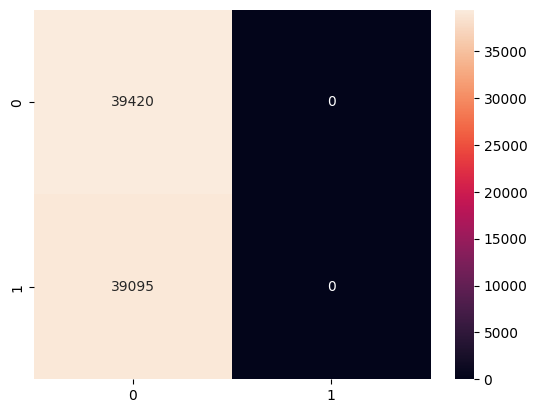

In [515]:
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, fmt='d')

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

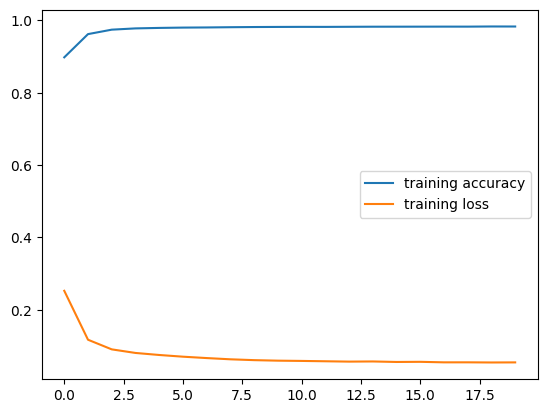

In [518]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['loss'], label='training loss')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [519]:
model.save('/content/drive/MyDrive/Week4 task/ANN.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### i did label encoding and not onehotencoding because the overhead, i made synthatic data from SMOTE to solve the data imbalance issues, my model consist of 1 input layer and one hidden and 1 output dense layers whech gave me amazing accuracy, relu for hidden layers and sigmoid for output layers for binary classification, model trained with 64 batch size and 20 epochs and adam optimizer which the nodel converge amazingly, binary crossentroby loss is what  is suited for binary classification, there's no need for Regularization Techniques and Model Tuning the model performed well without them, Model Evaluation on training, validation, testing set to find if there's an overfitting or underfitting and there's not anything, Model Visualization shows the model converges, there's no Overfitting or Underfitting
